Welcome to this comprehensive notebook where we will be diving deep into the world of Airbnb listings in Los Angeles, one of the most vibrant and sought-after travel destinations in the world. With its diverse neighborhoods, rich culture, and stunning landscapes, Los Angeles attracts millions of visitors each year. This makes it a thriving marketplace for Airbnb hosts, who offer a wide range of accommodations to meet the needs of every traveler.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/airbnb-2023/airbnb_los_angeles_listings_summary.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,930487087555321292,Home in La Puente · ★New · 1 bedroom · 1 bed ·...,482579539,Yahide,Unincorporated Areas,Rowland Heights,33.979625,-117.880993,Private room,35,1,0,NaN,NaN,9,0,0,NaN
1,906882865272179753,Home in Bell · 1 bedroom · 1 bed · 2 baths,390414536,Paulo,Other Cities,Bell,33.981930,-118.200480,Private room,80,1,0,NaN,NaN,91,364,0,NaN
2,942342470598573002,Home in Rowland Heights · ★New · 1 bedroom · 2...,495867643,Lin,Unincorporated Areas,Rowland Heights,33.978508,-117.898650,Private room,69,1,0,NaN,NaN,4,359,0,NaN


In [2]:
df['profit'] = df['price'] * df['availability_365']

To compare the potential profit, I added the expected profit column to the dataframe from the product of the price and the number of available days during the year.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44594.0,3.608885e+17,4.052286e+17,109.00000,2.901880e+07,5.219417e+07,7.851270e+17,9.723986e+17
host_id,44594.0,1.770578e+08,1.731999e+08,521.00000,2.513831e+07,1.074344e+08,3.217088e+08,5.349876e+08
latitude,44594.0,3.405374e+01,1.380320e-01,33.33854,3.399809e+01,3.406050e+01,3.410635e+01,3.481118e+01
longitude,44594.0,-1.183146e+02,1.713290e-01,-118.91641,-1.184128e+02,-1.183448e+02,-1.182397e+02,-1.176534e+02
price,44594.0,2.918501e+02,9.345373e+02,7.00000,9.100000e+01,1.500000e+02,2.520000e+02,9.999900e+04
minimum_nights,44594.0,1.772844e+01,2.866177e+01,1.00000,2.000000e+00,7.000000e+00,3.000000e+01,1.124000e+03
number_of_reviews,44594.0,3.437514e+01,7.563327e+01,0.00000,0.000000e+00,5.000000e+00,3.100000e+01,2.472000e+03
reviews_per_month,32962.0,1.509050e+00,1.777512e+00,0.01000,2.300000e-01,8.300000e-01,2.300000e+00,5.849000e+01
calculated_host_listings_count,44594.0,2.309077e+01,8.828989e+01,1.00000,1.000000e+00,2.000000e+00,1.000000e+01,6.920000e+02
availability_365,44594.0,1.956146e+02,1.377001e+02,0.00000,6.600000e+01,1.910000e+02,3.390000e+02,3.650000e+02


In [4]:
df = df[df['price']<5000]

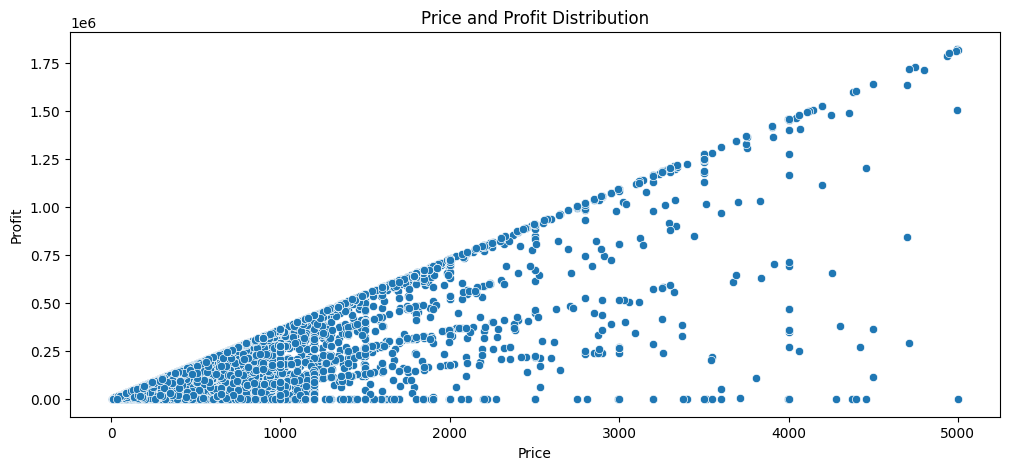

In [5]:
plt.figure(figsize=(12, 5))
plt.title('Price and Profit Distribution')

sns.scatterplot(df, x='price', y='profit')

plt.xlabel('Price')
plt.ylabel('Profit')
plt.show()

As you can see, most of the rental cases are in the low price and low profit section.

## Hosts with the highest expected profit

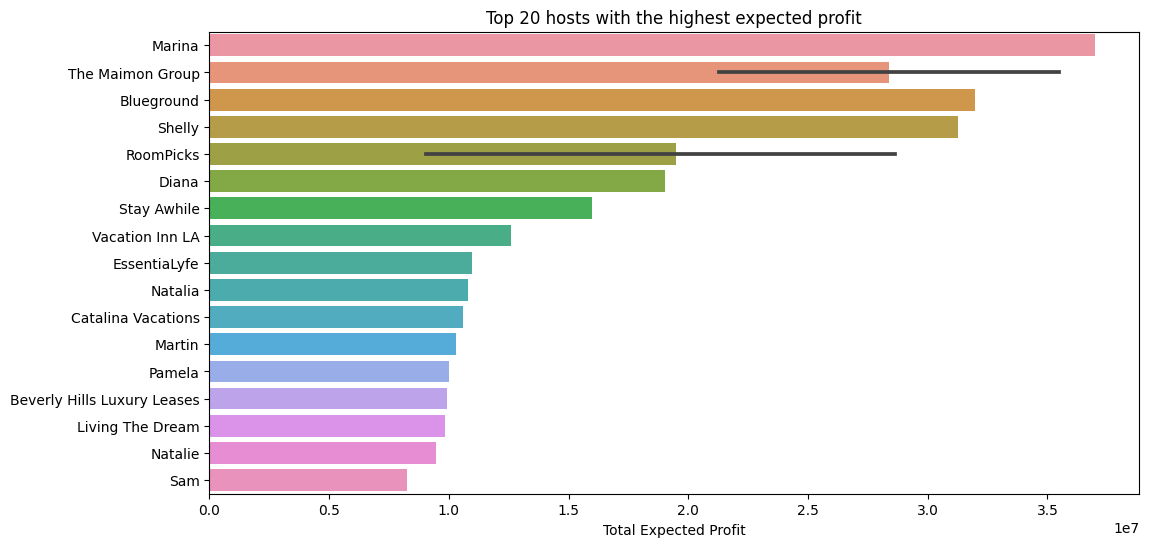

In [6]:
df1 = df.groupby(['host_name', 'host_id'])['profit'].sum().reset_index(name='total profit').sort_values(by='total profit', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Top 20 hosts with the highest expected profit')

sns.barplot(df1.head(20), x='total profit', y='host_name')

plt.xlabel('Total Expected Profit')
plt.ylabel('')
plt.show()

## Neighborhoods with the most rental items

Rental items are categorized into three groups. In the picture below, you can see the number of rental items in each group.

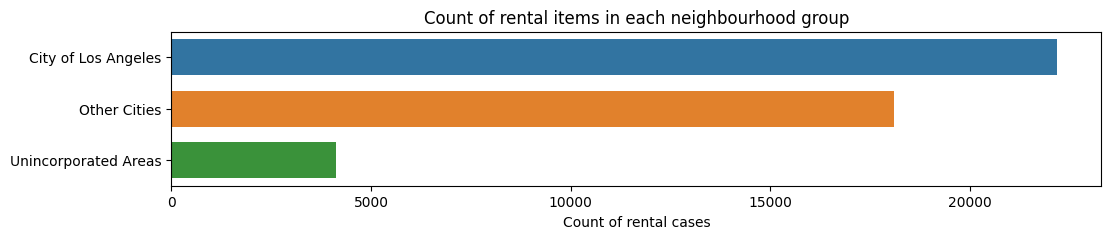

In [7]:
df2 = df.groupby('neighbourhood_group').size().reset_index(name='count').sort_values(by='count', ascending=False)


plt.figure(figsize=(12, 2))
plt.title('Count of rental items in each neighbourhood group')

sns.barplot(df2, x='count', y='neighbourhood_group', width=0.7)

plt.xlabel('Count of rental cases')
plt.ylabel('')
plt.show()

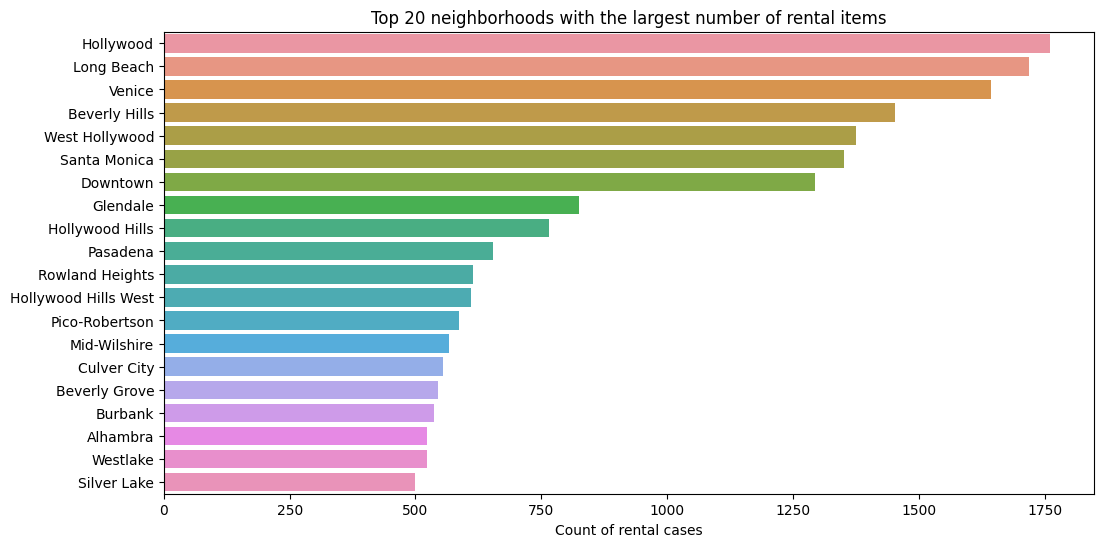

In [8]:
df3 = df.groupby('neighbourhood').size().reset_index(name='count'). sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Top 20 neighborhoods with the largest number of rental items')

sns.barplot(df3.head(20), x='count', y='neighbourhood')

plt.xlabel('Count of rental cases')
plt.ylabel('')
plt.show()

## Neighborhoods with the highest average price

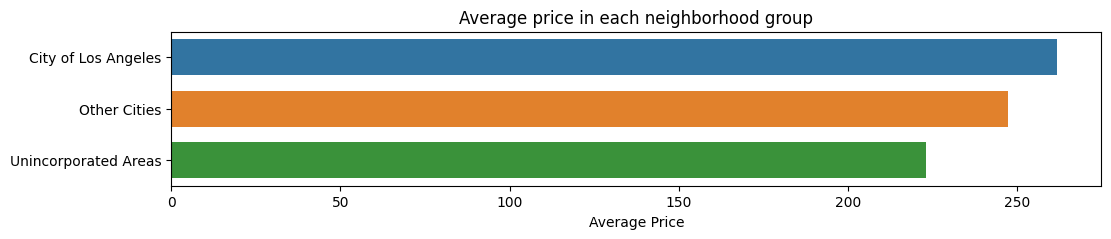

In [9]:
df4 = df.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 2))
plt.title('Average price in each neighborhood group')

sns.barplot(df4, x='price', y='neighbourhood_group', width=0.7)

plt.xlabel('Average Price')
plt.ylabel('')
plt.show()

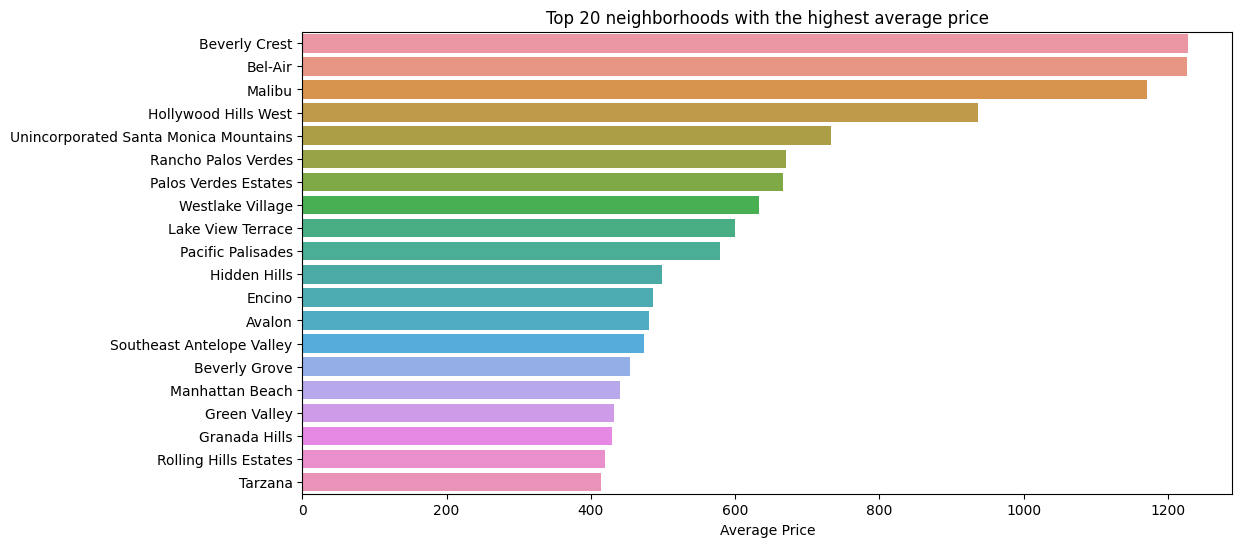

In [10]:
df5 = df.groupby('neighbourhood')['price'].mean().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Top 20 neighborhoods with the highest average price')

sns.barplot(df5.head(20), x='price', y='neighbourhood')

plt.xlabel('Average Price')
plt.ylabel('')
plt.show()

## Neighborhoods with the highest expected profit

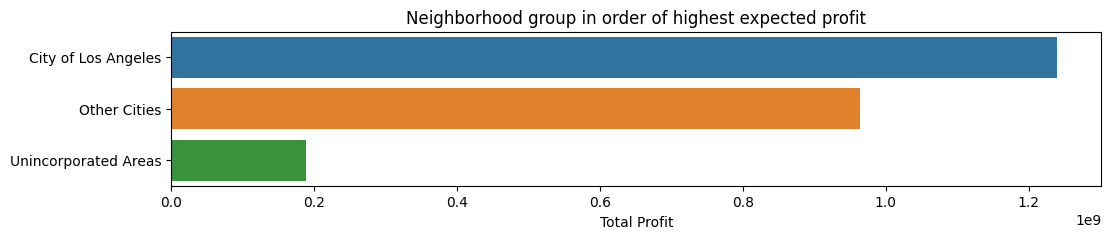

In [11]:
df6 = df.groupby('neighbourhood_group')['profit'].sum().reset_index(name='total profit').sort_values(by='total profit', ascending=False)

plt.figure(figsize=(12,2))
plt.title('Neighborhood group in order of highest expected profit')

sns.barplot(df6, x='total profit', y='neighbourhood_group')

plt.xlabel('Total Profit')
plt.ylabel('')
plt.show()

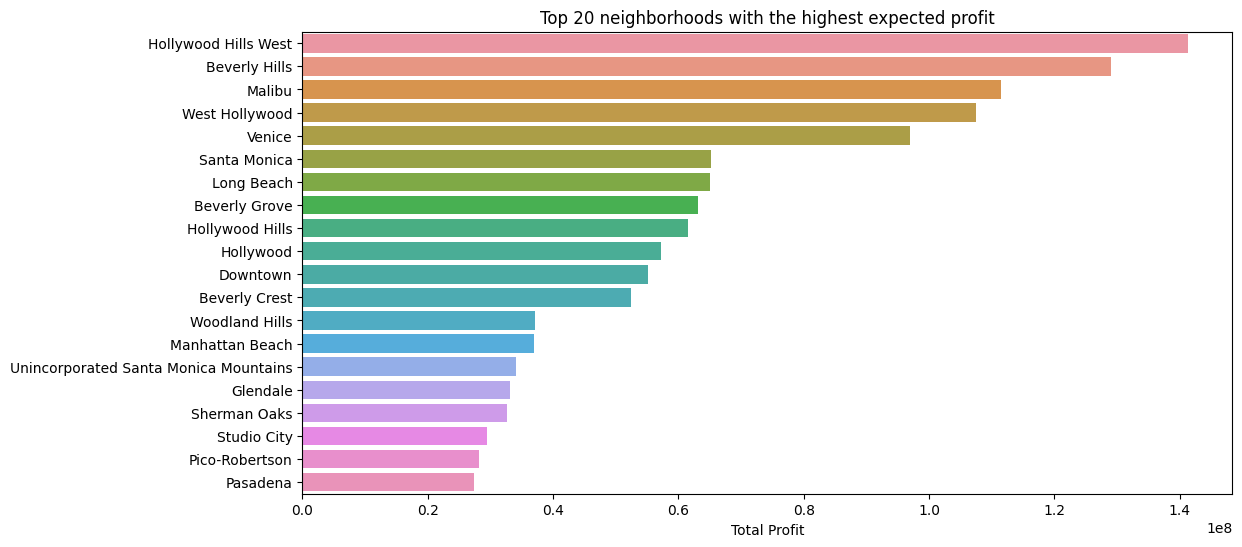

In [12]:
df7 = df.groupby('neighbourhood')['profit'].sum().reset_index(name='total profit').sort_values(by='total profit', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Top 20 neighborhoods with the highest expected profit')

sns.barplot(df7.head(20), x='total profit', y='neighbourhood')

plt.xlabel('Total Profit')
plt.ylabel('')
plt.show()